Labels Asli (y_test): [0 1]
Prediksi Model (y_pred): [0 1]
Akurasi Model: 1.0


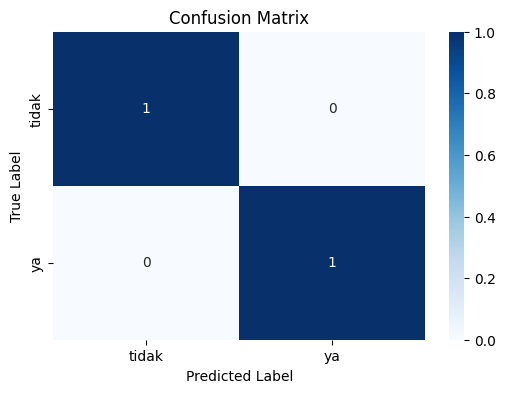

<ipython-input-3-5746c2d3ab7d>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_names, palette='viridis')


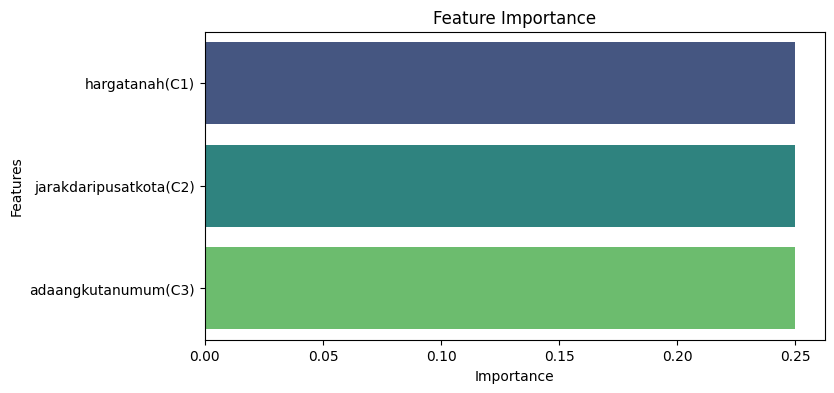

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

file_path = '/content/data.xlsx'
df = pd.read_excel(file_path)

ncoder = LabelEncoder()
encoded_df = df.apply(ncoder.fit_transform)  # Changed 'encoder' to 'ncoder'

X = encoded_df.iloc[:, 1:-1]
y = encoded_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Labels Asli (y_test):", y_test.values)
print("Prediksi Model (y_pred):", y_pred)
print("Akurasi Model:", accuracy)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=ncoder.classes_, yticklabels=ncoder.classes_)  # Changed 'encoder' to 'ncoder'
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

feature_importance = abs(nb_classifier.theta_[1] - nb_classifier.theta_[0])
feature_names = X.columns

plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importance, y=feature_names, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()